# MIDTERM : Analytics Technology


---

In this assignment you are going to have several tasks:

1.	Import several CSV files:
  -	Physicians
  -	Scripts (files 1 – 10)
  -	Zip Codes

2.	Create provider summary and org summary tables

3.	There are 10 analysis questions each requiring a TABLE and at least 1 CHART (Barplot) To get the results you’ll likely need to break things up into steps and perform various steps including:
  -	Query to filter data
  -	Merge  to join data
  -	N-largest / N-smallest (top N, Bottom N)
  -	Concat to append datasets together
  -	agg (sum, count, mean, min, max)
  -	create barplots using seaborn
  -	Rename columns using df.column = [“col1”,”col2”,…]

4.	Devise 5 of your own analysis questions answered with tables and visualizations

6. Extra Credit


In [1]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

%matplotlib inline

## Import Data


---

You are provided several files you'll need to import the files and append (concat) them into a single table after you import.

```python
example = pd.concat(["phys1","phys2","phys3"],axis=0)
example.head()
```

**Providers:**

https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_1.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_2.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_3.csv

**Prescriptions:**

https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_1.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_2.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_3.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_4.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_5.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_6.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_7.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_8.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_9.csv
https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_10.csv

**Zips:**
"https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv"

NOTE: zips is delimited by `;`
```python

zips = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv",sep=";")
zips.head()
```

My advice is to clean up the column names using:
```python
zips.columns = ( zips.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(zips.columns)
zips.head()
```

In [2]:
# import steps
provides = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_1.csv")
provides1 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_2.csv")
provides2 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_physicians_3.csv")
# Physicians = pd.concat("provide")
Physician = pd.concat([provides,provides1,provides2],axis=0)
Physician.columns = ( Physician.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)
Physician




,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,bene_cc_dprssn_pct,bene_cc_dbts_pct,bene_cc_hyplpdma_pct,bene_cc_hyprtnsn_pct,bene_cc_ihd_pct,bene_cc_opo_pct,bene_cc_raoa_pct,bene_cc_sz_pct,bene_cc_strok_pct,bene_avg_risk_scre
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,0.27,0.28,0.46,0.62,0.22,0.09,0.38,0.06,NaN,1.3417
1,1003000936,Stellingworth,Mark,A,MD,M,I,701 Medical Park Dr Ste 301,NaN,Hartsville,...,0.25,0.45,0.75,0.75,0.64,0.07,0.53,0.04,0.13,1.8890
2,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,0.18,0.18,0.52,0.55,0.25,NaN,0.36,0.00,NaN,0.8218
3,1003002841,Choudhary,Saher,K,M.D.,F,I,109 Physicians Dr Ste C,NaN,Greer,...,0.41,0.42,0.75,0.75,0.49,0.12,0.42,NaN,0.74,1.8582
4,1003006172,Quezada,Nestor,NaN,MD,M,I,4539 Hedgemore Dr,Ste 100,Charlotte,...,0.43,0.57,0.71,0.75,0.47,0.11,0.52,0.06,0.14,3.2293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28006,1992990717,Major,Rebecca,NaN,OD,F,I,8811 Blakeney Professional Dr,Suite 100,Charlotte,...,NaN,0.23,0.65,0.59,0.21,NaN,0.39,0.00,NaN,0.7704
28007,1992992317,Ammann,Connie,B,OTR/L,F,I,4557 Technology Dr,Suite 1,Wilmington,...,0.26,0.42,0.69,0.75,0.36,0.10,0.62,NaN,NaN,1.6134
28008,1992993760,Chakraborty,Kanishka,NaN,M.D,M,I,1 Professional Park Dr,Suite 21,Johnson City,...,0.31,0.39,0.63,0.75,0.53,0.12,0.45,NaN,0.09,2.4880
28009,1992996292,Giles,Wesley,H,MD,M,I,979 E 3rd St Ste 300,NaN,Chattanooga,...,0.28,0.36,0.65,0.75,0.41,0.11,0.51,NaN,0.06,1.7188


In [ ]:
'''
for i in file_name:
  data = pd.read_csv(name)
  providers_list.append(data)
physicians = pd.concat(providers_list, axis = 0)
physician.columns = (physicians.columns
      .str.strip()
      .str.lower()
      .str.replace(' ','_')
      .str.replace('-','_')
      .str.replace('(', '')
      .str.replace(')', '')
      .str.replace('?', '')
      .str.replace('\', '')
      )
'''

In [3]:
# import steps
prescriptions0 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_1.csv")
prescriptions1 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_2.csv")
prescriptions2 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_3.csv")
prescriptions3 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_4.csv")
prescriptions4 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_5.csv")
prescriptions5 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_6.csv")
prescriptions6 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_7.csv")
prescriptions7 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_8.csv")
prescriptions8 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_9.csv")
prescriptions9 = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/scnctn_scripts_10.csv")
Prescriptions = pd.concat([prescriptions0,prescriptions1,prescriptions2,prescriptions3,
                           prescriptions4,prescriptions5,prescriptions6,
                           prescriptions7,prescriptions8,prescriptions9],axis=0)
Prescriptions = Prescriptions.drop(columns=['...1'])
Prescriptions.columns = ( Prescriptions.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)
Prescriptions


,prscrbr_npi,brnd_name,gnrc_name,tot_clms,tot_30day_fills,tot_day_suply,tot_drug_cst,tot_benes,is_opiate
0,1003000720,Albuterol Sulfate Hfa,Albuterol Sulfate,14,14.0,337,657.01,14.0,No
1,1003000720,Amoxicillin-Clavulanate Potass,Amoxicillin/Potassium Clav,34,34.0,328,412.06,34.0,No
2,1003000720,Azithromycin,Azithromycin,12,12.0,52,87.21,12.0,No
3,1003000720,Cephalexin,Cephalexin,25,25.0,211,144.27,25.0,No
4,1003000720,Clindamycin Hcl,Clindamycin Hcl,11,11.0,87,111.93,11.0,No
...,...,...,...,...,...,...,...,...,...
197559,1992993760,Trazodone Hcl,Trazodone Hcl,15,19.0,570,90.73,NaN,No
197560,1992993760,Valacyclovir,Valacyclovir Hcl,24,34.0,1020,1811.73,NaN,No
197561,1992993760,Xarelto,Rivaroxaban,19,19.0,570,8936.06,NaN,No
197562,1992996292,Hydrocodone-Acetaminophen,Hydrocodone/Acetaminophen,36,36.0,83,127.46,35.0,Yes


In [4]:
# import steps
zips = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_5/mid-term/zipcode_usa.csv",sep=";")
# clean up column names
zips.columns = ( zips.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
zips

,zip_code,official_usps_city_name,official_usps_state_code,official_state_name,zcta,zcta_parent,population,density,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point
0,90005,Los Angeles,CA,California,True,NaN,39732.0,14151.8,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.05912, -118.30654"
1,90006,Los Angeles,CA,California,True,NaN,59576.0,11981.7,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.04801, -118.29418"
2,90008,Los Angeles,CA,California,True,NaN,31754.0,3337.9,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"34.00956, -118.34706"
3,90040,Los Angeles,CA,California,True,NaN,12328.0,852.8,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.99353, -118.14907"
4,90045,Los Angeles,CA,California,True,NaN,40567.0,1459.6,6037,Los Angeles,"{""06037"": ""100""}",Los Angeles,6037,False,False,America/Los_Angeles,"33.95297, -118.40014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,99733,Circle,AK,Alaska,True,NaN,64.0,0.2,2290,Yukon-Koyukuk,"{""02290"": ""100""}",Yukon-Koyukuk,2290,False,False,America/Anchorage,"65.79284, -144.18283"
33117,99741,Galena,AK,Alaska,True,NaN,495.0,10.8,2290,Yukon-Koyukuk,"{""02290"": ""100""}",Yukon-Koyukuk,2290,False,False,America/Anchorage,"64.7388, -156.85894"
33118,99751,Kobuk,AK,Alaska,True,NaN,140.0,9.5,2188,Northwest Arctic,"{""02188"": ""100""}",Northwest Arctic,2188,False,False,America/Anchorage,"66.91926, -156.87006"
33119,99761,Noatak,AK,Alaska,True,NaN,415.0,10.1,2188,Northwest Arctic,"{""02188"": ""100""}",Northwest Arctic,2188,False,False,America/Nome,"67.60042, -163.03461"


## TASK 2 – STRUCTURE



---

### TASK 2A - Create Provider Summary

### TASK 2b - Create Org Summary


In [5]:
# Create Phsycian_summary
Provider = Physician[Physician['rndrng_prvdr_ent_cd']=="I"]
Physician_summary = Provider.merge(zips,left_on = "rndrng_prvdr_zip5",right_on = "zip_code")
Physician_summary["provider_name"] = Physician_summary["rndrng_npi"].astype(str)+":"+ \
                                    Physician_summary["rndrng_prvdr_first_name"]+""+\
                                    Physician_summary["rndrng_prvdr_last_org_name"]
Physician_summary

,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point,provider_name
0,1003000720,Hernandez,Otniel,NaN,DNP,M,I,3163 Gammon Ln Ste 422,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1003000720:OtnielHernandez
1,1013204148,Merritt,Carrie,H,PA,F,I,105 Stadium Oaks Dr,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1013204148:CarrieMerritt
2,1013949759,Choiniere,G.,L,"NP, PHD, LPC",M,I,3163 Gammon Ln,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1013949759:G.Choiniere
3,1013998848,Riccoboni,Michael,J,DC,M,I,6774 River Center Drive,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1013998848:MichaelRiccoboni
4,1063481497,Doyle,Rose,K,CRNA,F,I,1817 Curraghmore Rd,NaN,Clemmons,...,37067,Forsyth,"{""37067"": ""80.04"", ""37057"": ""19.96""}","Forsyth,Davidson","37067,37057",False,False,America/New_York,"36.0041, -80.37582",1063481497:RoseDoyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,1982041182,Moreland,Natalie,J,"M.S., CCC-SLP",F,I,55 Nursing Home Rd,NaN,Chuckey,...,47059,Greene,"{""47059"": ""78.76"", ""47179"": ""21.24""}","Greene,Washington","47059,47179",False,False,America/New_York,"36.19901, -82.66422",1982041182:NatalieMoreland
72654,1992072524,Graham,Patton,D,NP-C,M,I,6419 Arno College Grove Rd,NaN,College Grove,...,47187,Williamson,"{""47187"": ""96.4"", ""47149"": ""1.96"", ""47117"": ""1...","Williamson,Rutherford,Marshall","47187,47149,47117",False,False,America/Chicago,"35.77988, -86.71733",1992072524:PattonGraham
72655,1992785653,Nieto,Charles,M,M.D.,M,I,4789 State Rd,NaN,Ridgeville,...,45035,Dorchester,"{""45035"": ""68.86"", ""45015"": ""24.71"", ""45029"": ...","Dorchester,Berkeley,Colleton","45035,45015,45029",False,False,America/New_York,"33.05707, -80.31845",1992785653:CharlesNieto
72656,1992804587,Warren,Joseph,R,PA,M,I,109 S Sycamore St,NaN,Fremont,...,37191,Wayne,"{""37191"": ""93.96"", ""37195"": ""6.04""}","Wayne,Wilson","37191,37195",False,False,America/New_York,"35.55528, -77.95795",1992804587:JosephWarren


In [6]:
# Create Phsycian_summary
Org = Physician[Physician['rndrng_prvdr_ent_cd']=="O"]
Org_summary = Org.merge(zips,left_on = "rndrng_prvdr_zip5",right_on = "zip_code", how = "inner")
Org_summary["org_name"] = Org_summary["rndrng_npi"].astype(str)+":"+ \
                              Org_summary["rndrng_prvdr_last_org_name"]+"-"+\
                              Org_summary["official_usps_state_code"]
Org_summary



,rndrng_npi,rndrng_prvdr_last_org_name,rndrng_prvdr_first_name,rndrng_prvdr_mi,rndrng_prvdr_crdntls,rndrng_prvdr_gndr,rndrng_prvdr_ent_cd,rndrng_prvdr_st1,rndrng_prvdr_st2,rndrng_prvdr_city,...,primary_official_county_code,primary_official_county_name,county_weights,official_county_name,official_county_code,imprecise,military,timezone,geo_point,org_name
0,1003002254,Walgreen Co.,NaN,NaN,NaN,NaN,O,5104 Bobby Hicks Hwy,NaN,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1003002254:Walgreen Co.-TN
1,1033624853,East Tennessee Healthcare Holdings Inc,NaN,NaN,NaN,NaN,O,203 Gray Commons Cir Ste 110,NaN,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1033624853:East Tennessee Healthcare Holdings ...
2,1073940334,"Boones Creek Pharmacy, Inc.",NaN,NaN,NaN,NaN,O,4729 N Roan St,Ste 2,Johnson City,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219","1073940334:Boones Creek Pharmacy, Inc.-TN"
3,1194812446,Tritenn Llc,NaN,NaN,NaN,NaN,O,208 Suncrest St,Ste 1,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1194812446:Tritenn Llc-TN
4,1366469843,K Va T Food Stores Inc,NaN,NaN,NaN,NaN,O,125 Judge Gresham Rd,NaN,Gray,...,47179,Washington,"{""47179"": ""100""}",Washington,47179,False,False,America/New_York,"36.39958, -82.45219",1366469843:K Va T Food Stores Inc-TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,1982707691,"Tennessee Cvs Pharmacy, L.L.C.",NaN,NaN,NaN,NaN,O,340 West Main Street,NaN,Monteagle,...,47061,Grundy,"{""47061"": ""63.23"", ""47115"": ""36.77""}","Grundy,Marion","47061,47115",False,False,America/Chicago,"35.22901, -85.82423","1982707691:Tennessee Cvs Pharmacy, L.L.C.-TN"
4275,1982773909,Todd's Discount Drugs Inc.,NaN,NaN,NaN,NaN,O,347 E Main St,NaN,Adamsville,...,47109,McNairy,"{""47109"": ""66.72"", ""47071"": ""33.28""}","McNairy,Hardin","47109,47071",False,False,America/Chicago,"35.25849, -88.39883",1982773909:Todd's Discount Drugs Inc.-TN
4276,1992141717,Shoreline Imaging,NaN,NaN,NaN,NaN,O,910 Gypsy Ln,NaN,Mc Clellanville,...,45019,Charleston,"{""45019"": ""100""}",Charleston,45019,False,False,America/New_York,"33.09891, -79.45896",1992141717:Shoreline Imaging-SC
4277,1992808679,North Carolina Cvs Pharmacy Llc,NaN,NaN,NaN,NaN,O,1022 Albemarle Rd,NaN,Troy,...,37123,Montgomery,"{""37123"": ""97.43"", ""37151"": ""2.57""}","Montgomery,Randolph","37123,37151",False,False,America/New_York,"35.42018, -79.95884",1992808679:North Carolina Cvs Pharmacy Llc-NC


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# TASK 3 - ANALYSIS



---

There are 10 analysis tasks, requiring you to build a table (RESnn) and at least one bar-chart. For each analysis add a Markdown Cell at the top denoting which analysis step this is. i've added an example for Analysis result 1


## RES01:  “TOP 10 MEDICARE PROVIDERS BY TOT_MDCR_PYMT_AMT”


---




## RES01


In [16]:
RES01 = Physician_summary[["provider_name","tot_mdcr_pymt_amt"]].nlargest(10,"tot_mdcr_pymt_amt")
RES01.columns = ["Provider_Name","Sum total payment"]
RES01 = RES01.reset_index()
RES01 = RES01.drop(columns = ['index'])
print('RES01: TOP 10 MEDICARE PROVIDERS BY TOT_MDCR_PYMT_AMT')
RES01


RES01: TOP 10 MEDICARE PROVIDERS BY TOT_MDCR_PYMT_AMT


,Provider_Name,Sum total payment
0,1851320691:BradleySomer,14030052.64
1,1366683823:WandaLowery,11462667.60
2,1750541553:ShilPatel,10526851.61
3,1023018728:RossKerns,8945222.23
4,1801103643:Syed SameerNasir,8347614.58
5,1679529473:DavidPortnoy,8169092.45
6,1639179708:MitchellMartin,8148045.67
7,1932209855:RobertLavey,8060160.20
8,1982670147:JohnDoster,7796761.71
9,1619947876:DanielIbach,7643785.10


RES01 graph


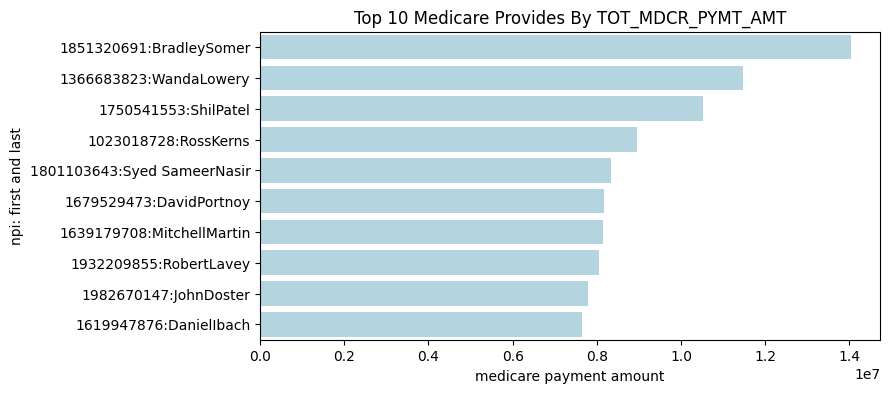

In [17]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES01, x = RES01["Sum total payment"], y = RES01["Provider_Name"], color = 'lightblue')
plt.title("Top 10 Medicare Provides By TOT_MDCR_PYMT_AMT")
plt.ylabel("npi: first and last")
plt.xlabel("medicare payment amount")
print('RES01 graph')
plt.show()

# RES02: TITLE “TOP 10 MEDICARE ORGANIZATIONS BY TOT_MDCR_PYMT_AMT”


---



## RES02

In [18]:
RES02 = Org_summary[["org_name","tot_mdcr_pymt_amt"]].nlargest(10,"tot_mdcr_pymt_amt")
RES02.columns = ["org_name","sum total payment"]
RES02 = RES02.reset_index()
RES02 = RES02.drop(columns = ['index'])
print('RES02: TOP 10 MEDICARE ORGANIZATIONS BY TOT_MDCR_PYMT_AMT')
RES02

RES02: TOP 10 MEDICARE ORGANIZATIONS BY TOT_MDCR_PYMT_AMT


,org_name,sum total payment
0,1538144910:Laboratory Corporation Of America H...,234670845.50
1,"1174009245:Vikor Scientific, Llc-SC",42198509.44
2,1699782722:Aegis Sciences Corporation-TN,33066425.94
3,"1134538713:Mako Medical Laboratories, Llc-NC",31287531.70
4,"1235186800:Pathgroup Labs, Llc-TN",21797255.78
5,1548370745:Memphis Pathology Laboratory-TN,20159010.52
6,1750368700:Laboratory Corporation Of America H...,19643419.72
7,1124417357:Aegis Sciences Corporation-TN,16931095.66
8,1487212551:Quest Diagnostics Clinical Laborato...,15866817.32
9,"1508215922:Foundation Medicine, Inc.-NC",15640629.10


RES02 graph


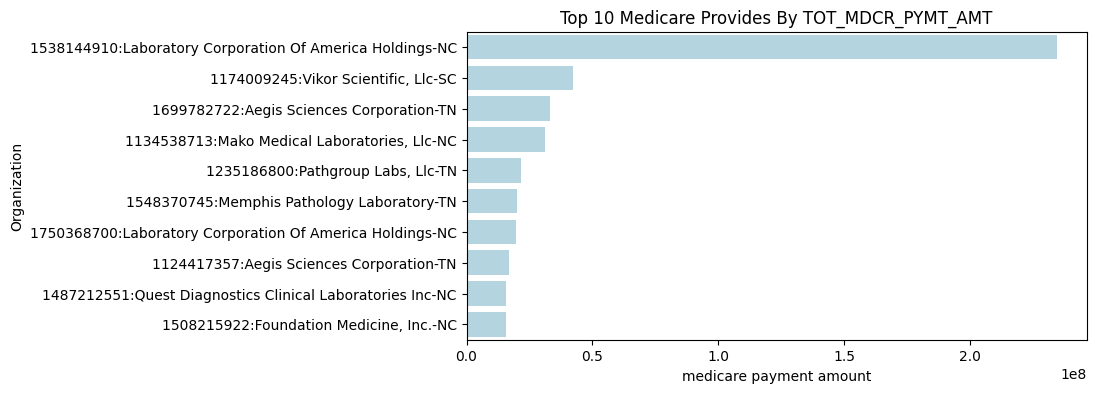

In [19]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES02, x = RES02["sum total payment"], y = RES02["org_name"], color = 'lightblue')
plt.title("Top 10 Medicare Provides By TOT_MDCR_PYMT_AMT")
plt.ylabel("Organization")
plt.xlabel("medicare payment amount")
print('RES02 graph')
plt.show()

## RES03: TITLE “NURSE PRACTITIONERS BY STATE”


---



## RES03


In [20]:
# Using physician_summary, create a table and chart of “Nurse Practitioner” using rndrng_prvdr_type and rndrng_prvdr_state_abrvtn
practitioner = Physician_summary[Physician_summary['rndrng_prvdr_type'].str.contains("Nurse Practitioner")]
practitioner
RES03 = practitioner['rndrng_prvdr_state_abrvtn'].value_counts().reset_index()
RES03.columns = ["rndrng_prvdr_state_abrvtn", "count"]
print('RES03: NURSE PRACTITIONERS BY STATE')
RES03
#Nurse_Practitioner = Physician_summay.groupby(['rndrng_prvdr_state_abrvtn']).aggregate({})

RES03: NURSE PRACTITIONERS BY STATE


,rndrng_prvdr_state_abrvtn,count
0,TN,5314
1,NC,4997
2,SC,2552


RES03 graph


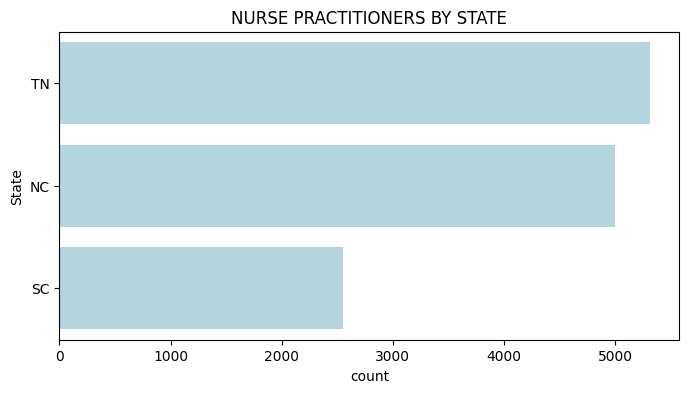

In [21]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES03, x = RES03["count"], y = RES03["rndrng_prvdr_state_abrvtn"], color = 'lightblue')
plt.title("NURSE PRACTITIONERS BY STATE")
plt.ylabel("State")
plt.xlabel("count")
print('RES03 graph')
plt.show()

## RES04: TITLE “ORGANIZATION TOTAL SPENDING BY STATE


---



## RES04


In [22]:
# Using org_summary, summarize tot_mdcr_pymt_amt  by rndrng_prvdr_state_abrvtn (state)
# Payment = Org_summary.groupby(['rndrng_prvdr_state_abrvtn']).aggregate({'tot_mdcr_pymt_amt':['sum'].asending = False})
RES04 = Org_summary.groupby(['rndrng_prvdr_state_abrvtn']).aggregate({'tot_mdcr_pymt_amt': 'sum'}).sort_values(by=["tot_mdcr_pymt_amt"],ascending = False).reset_index()
RES04.columns = ["state","sum"]
print('RES04: ORGANIZATION TOTAL SPENDING BY STATE')
RES04

RES04: ORGANIZATION TOTAL SPENDING BY STATE


,state,sum
0,NC,641174881.69
1,TN,408660971.70
2,SC,289073137.76


RES04 graph


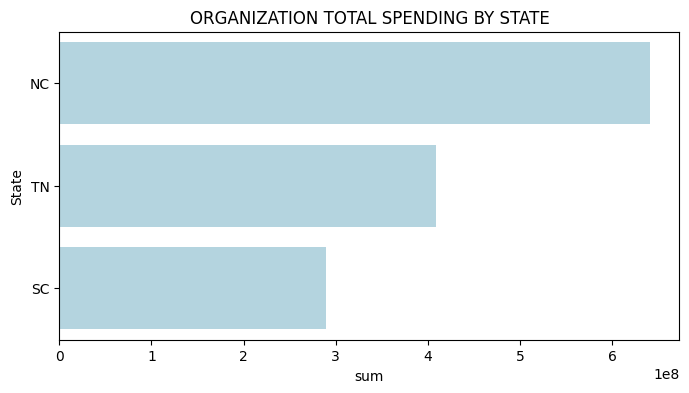

In [23]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES04, x = RES04["sum"], y = RES04["state"], color = 'lightblue')
plt.title("ORGANIZATION TOTAL SPENDING BY STATE")
plt.ylabel("State")
plt.xlabel("sum")
print('RES04 graph')
plt.show()

## RES05: TITLE “TOP 5 ORG SPENDING BY STATE AND SPECIALTY”


---



## RES05

In [24]:
# Use org_summary, sum tot_mdcr_pymt_amt  by rndrng_prvdr_state_abrvtn and rndrng_prvdr_type you should get the
# top 5 provider types by the sum of tot_mdcr_pymt_amt  for each state.
RES05 = Org_summary.groupby(['rndrng_prvdr_state_abrvtn','rndrng_prvdr_type']).aggregate({'tot_mdcr_pymt_amt': 'sum'}).reset_index()
RES05.columns = ["state","provider_type","SUM"]
RES05 = RES05.sort_values(by = ["state", "SUM"], ascending = False).reset_index(drop = True)
RES05 = RES05.groupby(["state"]).head(5)
print('RES05: TOP 5 ORG SPENDING BY STATE AND SPECIALTY')
RES05

RES05: TOP 5 ORG SPENDING BY STATE AND SPECIALTY


,state,provider_type,SUM
0,TN,Clinical Laboratory,128751819.81
1,TN,Ambulance Service Provider,128737375.49
2,TN,Ambulatory Surgical Center,108401378.09
3,TN,Mass Immunizer Roster Biller,10849333.97
4,TN,Centralized Flu,7241423.04
12,SC,Ambulance Service Provider,109359849.01
13,SC,Ambulatory Surgical Center,78569205.43
14,SC,Clinical Laboratory,71811426.38
15,SC,Mass Immunizer Roster Biller,10384709.16
16,SC,Independent Diagnostic Testing Facility (IDTF),9208319.55


RES05 graph


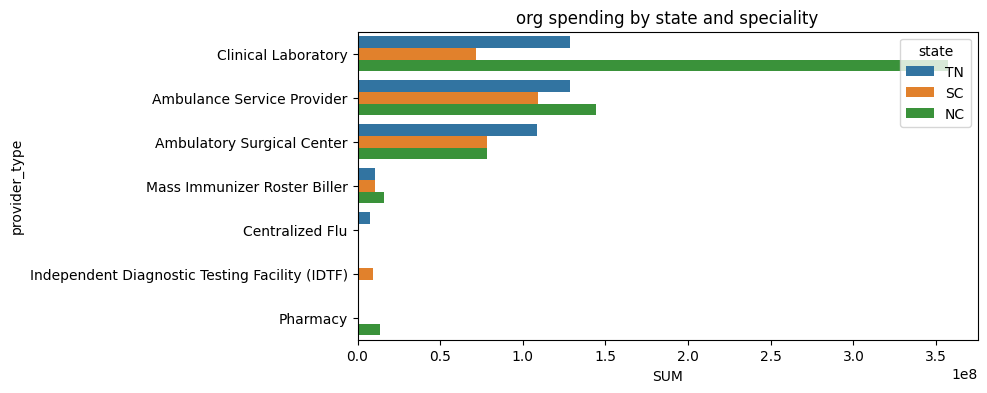

In [25]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES05, x = RES05["SUM"], y = RES05["provider_type"],hue="state")
plt.title("org spending by state and speciality")
plt.ylabel("provider_type")
plt.xlabel("SUM")
print('RES05 graph')
plt.show()

## RES06: TITLE “TOP 5 PROVIDERs by SPENDING SPECIALTY”

---



## RES06

In [26]:
# Use phys_summary, sum tot_mdcr_pymt_amt  and rndrng_prvdr_type you should get the top 5 provider types by the sum of tot_mdcr_pymt_amt
RES06 = Physician_summary.groupby(['rndrng_prvdr_type']).aggregate({'tot_mdcr_pymt_amt': 'sum'}).reset_index()
RES06.columns = ['rndrng_prvdr_type','sum']
RES06 = RES06.sort_values("sum", ascending = False).reset_index(drop = True)
RES06 = RES06.head()
print('RES06: TOP 5 PROVIDERs by SPENDING SPECIALTY')
RES06


RES06: TOP 5 PROVIDERs by SPENDING SPECIALTY


,rndrng_prvdr_type,sum
0,Ophthalmology,505082507.80
1,Internal Medicine,485139913.63
2,Hematology-Oncology,450390569.89
3,Nurse Practitioner,443327249.75
4,Family Practice,381226996.67


RES06 graph


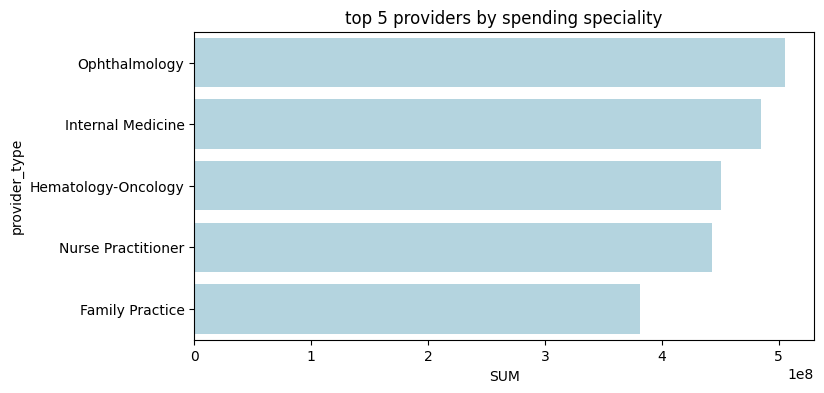

In [27]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES06, x = RES06["sum"], y = RES06["rndrng_prvdr_type"], color='lightblue')
plt.title("top 5 providers by spending speciality")
plt.ylabel("provider_type")
plt.xlabel("SUM")
print('RES06 graph')
plt.show()

## RES07: TITLE “TOP 10 GENERIC OPIATES BY TOTAL DAY SUPPLY”


---




## RES07

In [28]:
# Use prescriptions, filter for is_opiate == “Yes”
RES07 = Prescriptions[Prescriptions['is_opiate'] == 'Yes']
# group by gnrc_name sum tot_day_suply select the top 10 opiates
RES07 = RES07.groupby('gnrc_name').aggregate ('tot_day_suply').sum().reset_index()
RES07.columns = ['gnrc_name','tot_day_suply sum']
RES07 = RES07.nlargest(10,'tot_day_suply sum')
RES07.reset_index(drop = True)
print('RES07: TOP 10 GENERIC OPIATES BY TOTAL DAY SUPPLY')
RES07

RES07: TOP 10 GENERIC OPIATES BY TOTAL DAY SUPPLY


,gnrc_name,tot_day_suply sum
10,Hydrocodone/Acetaminophen,43131678
20,Oxycodone Hcl/Acetaminophen,25397036
24,Tramadol Hcl,24085196
19,Oxycodone Hcl,19525172
16,Morphine Sulfate,7015124
7,Fentanyl,2607143
15,Methadone Hcl,1330175
0,Acetaminophen With Codeine,1208236
12,Hydromorphone Hcl,1091654
2,Buprenorphine Hcl,1078222


RES07 graph


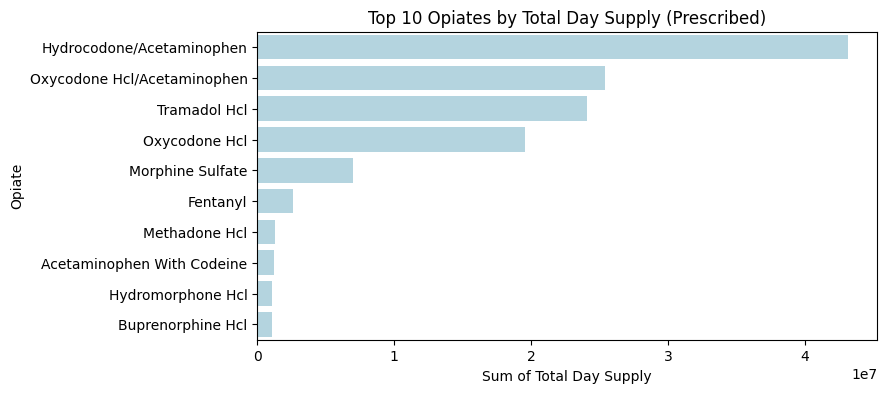

In [29]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES07, x = RES07["tot_day_suply sum"], y = RES07["gnrc_name"], color='lightblue')
plt.title("Top 10 Opiates by Total Day Supply (Prescribed)")
plt.ylabel("Opiate")
plt.xlabel("Sum of Total Day Supply")
print('RES07 graph')
plt.show()

## RES08: TITLE “TOP 10 MOST EXPENSIVE DRUGS”


---



## RES08

In [30]:
# Use prescriptions, create a new column called claim_cost by dividing tot_drug_cst by tot_clms then simply group by brnd_name and take the mean of top 10 brnd_name(brand name) drugs by claim cost
Prescriptions['claim_cost'] = Prescriptions['tot_drug_cst'] / Prescriptions['tot_clms']
# simply group by brnd_name and take the mean of top 10 brnd_name(brand name) drugs by claim cost
RES08 = Prescriptions.groupby('brnd_name').aggregate('claim_cost').mean().reset_index()
RES08.columns = ['brnd_name','mean']
RES08 = RES08.sort_values('mean',ascending = False).reset_index(drop = True).head(10)
print('RES08: TOP 10 MOST EXPENSIVE DRUGS')
RES08



RES08: TOP 10 MOST EXPENSIVE DRUGS


,brnd_name,mean
0,Myalept,165046.88
1,Strensiq,112137.00
2,Berinert,107622.89
3,Ravicti,95992.31
4,Firazyr,75005.84
5,Lumizyme,73466.83
6,Chenodal,65809.59
7,Aldurazyme,63541.30
8,Ayvakit,61090.00
9,Procysbi,57488.64


RES08 graph


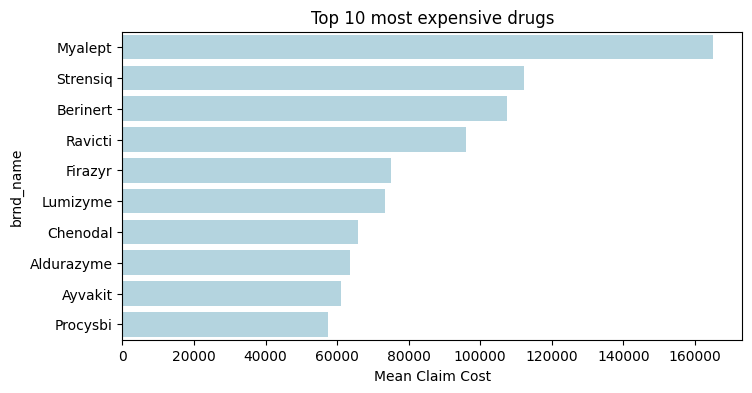

In [31]:
plt.figure(figsize = (8,4))
# plt.bar(data = RES01, x = RES01['Sum total payment'], height = RES01['Provider_Name'])
sns.barplot(data = RES08, x = RES08["mean"], y = RES08["brnd_name"], color='lightblue')
plt.title("Top 10 most expensive drugs")
plt.ylabel("brnd_name")
plt.xlabel("Mean Claim Cost")
print('RES08 graph')
plt.show()

## RES09: TITLE “TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE”


---



## RES09

In [ ]:
"""
# filter gnrc_name for “Hydrocodone/Acetaminophen” and “Oxycodone Hcl/Acetaminophen” (our top 2 opiates prescribed)
opipids = ["Hydrocodone/Acetaminophen", "Oxycodone Hcl/Acetaminophen"]
RES09 = Prescriptions[Prescriptions['gnrc_name'].isin(opipids)]
# Join result physican_summary
RES09 = RES09.merge(Physician_summary, left_on = 'prscrbr_npi'	 ,right_on = 'rndrng_npi'	, how = 'inner')
# Filter physican_summary  for official_usps_state_code for SC, NC, and TN
RES09 = RES09[RES09['official_usps_state_code'].isin(['SC','NC','TN'])].reset_index(drop = True)
# Group by ['official_usps_city_name', 'official_usps_state_code'], Get the sum and mean of tot_day_suply and tot_drug_cost
RES09 = RES09.groupby(['official_usps_state_code','official_usps_city_name']).agg({
     'tot_day_suply':['sum','mean'],
     'tot_drug_cst':['sum','mean']}).reset_index()
RES09.columns = ['official_usps_state_code','official_usps_city_name','tot_day_suply_sum','tot_day_suply_mean','tot_drug_cst_sum','tot_drug_cst_mean']\
# Sort values by 'official_usps_state_code' and 'tot_day_suply_sum'
RES09 = RES09.sort_values(by=["official_usps_state_code", "tot_day_suply_sum"], ascending=[False, False])
RES09["state_city"] = RES09["official_usps_state_code"] + " - " + RES09["official_usps_city_name"]
# Group by 'official_usps_state_code' and get the top 2 cities for each state
RES09 = RES09.groupby("official_usps_state_code").head(2)
RES09 = RES09.reset_index(drop=True)
print('RES09: TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE')
RES09

# RES05 = Org_summary.groupby(['rndrng_prvdr_state_abrvtn','rndrng_prvdr_type']).aggregate({'tot_mdcr_pymt_amt': 'sum'}).reset_index()
# RES05.columns = ["state","provider_type","SUM"]
# RES05 = RES05.sort_values(by = ["state", "SUM"], ascending = False).reset_index(drop = True)
# RES05 = RES05.groupby(["state"]).head(5)

# RES09["state_city"] = RES09["official_usps_state_code"] + " - " + RES09["official_usps_city_name"]
# # Sort values by Sum of tot_day_suply  largest to smallest (ascending = False)
"""

In [33]:
# filter gnrc_name for “Hydrocodone/Acetaminophen” and “Oxycodone Hcl/Acetaminophen” (our top 2 opiates prescribed)
opioids = ["Hydrocodone/Acetaminophen", "Oxycodone Hcl/Acetaminophen"]
RES09 = Prescriptions[Prescriptions['gnrc_name'].isin(opioids)]
# Join result physican_summary
RES09 = RES09.merge(Physician_summary, left_on = 'prscrbr_npi'	 ,right_on = 'rndrng_npi'	, how = 'inner')
# Filter physican_summary  for official_usps_state_code for SC, NC, and TN
RES09 = RES09[RES09['official_usps_state_code'].isin(['SC','NC','TN'])]
# Group by ['official_usps_city_name', 'official_usps_state_code'], Get the sum and mean of tot_day_suply and tot_drug_cost
RES09 = RES09.groupby(['official_usps_state_code','official_usps_city_name']).agg({
    'tot_day_suply':['sum','mean'],
    'tot_drug_cst':['sum','mean']}).reset_index()
RES09.columns = ['official_usps_state_code','official_usps_city_name','tot_day_suply_sum','tot_day_suply_mean','tot_drug_cst_sum','tot_drug_cst_mean']
RES09["state_city"] = RES09["official_usps_state_code"] + " - " + RES09["official_usps_city_name"]
# Sort values by Sum of tot_day_suply  largest to smallest (ascending = False)
RES09 = RES09.sort_values("tot_day_suply_sum", ascending = False).reset_index(drop = True)
RES09.T
grouped_by_state = RES09.groupby('official_usps_state_code')
RES09 = grouped_by_state.apply(lambda x: x.nlargest(2, 'tot_day_suply_sum'))
RES09 = RES09 .reset_index(drop=True)
print('RES09: TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE')
RES09




RES09: TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE


,official_usps_state_code,official_usps_city_name,tot_day_suply_sum,tot_day_suply_mean,tot_drug_cst_sum,tot_drug_cst_mean,state_city
0,NC,Charlotte,1779301,1581.60,2149922.08,1911.04,NC - Charlotte
1,NC,Raleigh,972031,1490.85,1660371.08,2546.58,NC - Raleigh
2,SC,Spartanburg,1418811,4247.94,1498101.82,4485.33,SC - Spartanburg
3,SC,Florence,870433,2772.08,1371700.68,4368.47,SC - Florence
4,TN,Knoxville,1924268,1937.83,2268781.57,2284.77,TN - Knoxville
5,TN,Chattanooga,1690470,2493.32,1910374.18,2817.66,TN - Chattanooga


RES09 graph


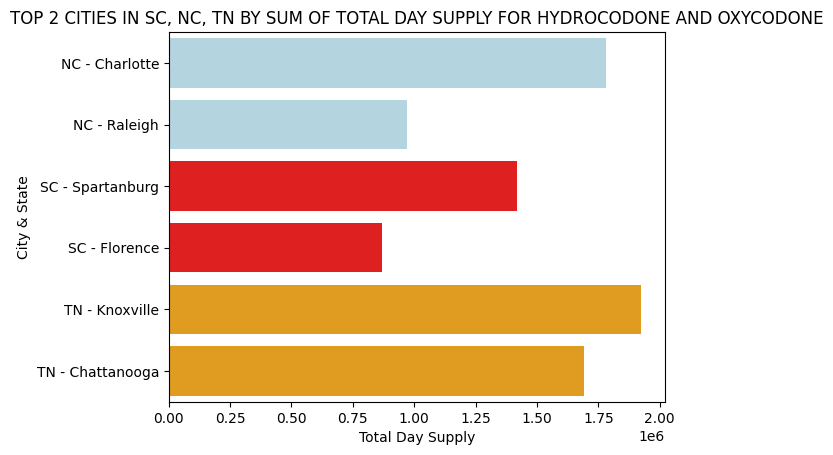

RES09 graph


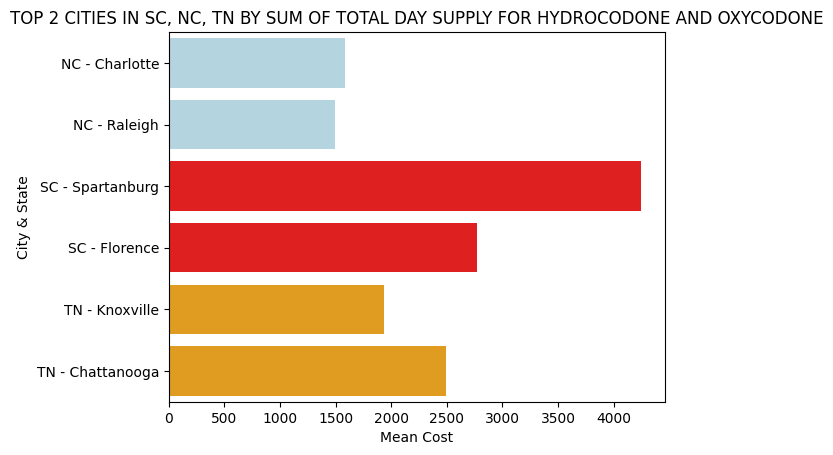

In [34]:
my_palette = {"TN - Knoxville": "orange",
              "TN - Chattanooga": "orange",
              "SC - Spartanburg": "red",
              "SC - Florence":"red",
              "NC - Charlotte" : "lightblue",
              "NC - Raleigh" : "lightblue"
              }

sns.barplot(data = RES09, y="state_city", x="tot_day_suply_sum", palette = my_palette);
plt.title("TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE")
plt.ylabel("City & State")
plt.xlabel("Total Day Supply")
print('RES09 graph')
plt.show()

sns.barplot(data=RES09, y="state_city", x="tot_day_suply_mean", palette = my_palette);
plt.title("TOP 2 CITIES IN SC, NC, TN BY SUM OF TOTAL DAY SUPPLY FOR HYDROCODONE AND OXYCODONE")
plt.ylabel("City & State")
plt.xlabel("Mean Cost")
print('RES09 graph')
plt.show()

## RES09 Analysis


From the total day supplay graph, Tennessee is the state which has the largest daily supply for Hydrocodone and Oxycodone, and Knoxville is the city has the largest daily supply in Tennessee. And South Carolina is the state which has the least daily supply for Hydrocodone and Oxycodone, and Florence has the least daily supply in South Carolina.

From the mean ocst graph, South Carolina has the largest average cost for Hydrocodone and Oxycodone, and Spartanburg is the city has the largest average cost in South Carolina.And North Carolina is the state which has the least average in Hydrocodone and Oxycodone, and Raleigh has the least average cost in North Carolina.


## RES10: TITLE "AN OPIATE A DAY"


---



In [35]:
RES10 = pd.merge(zips,RES09, how = "inner", on =['official_usps_state_code','official_usps_city_name'])
RES10_1 = RES10.groupby(['official_usps_state_code','official_usps_city_name']).agg({
    'population':['sum']
}).reset_index()
RES10_1.columns = ['official_usps_state_code','official_usps_city_name','population_sum']
RES10_2 = pd.merge(RES10_1, RES09,how="outer")
RES10_2 = pd.merge(RES10_1, RES09, how = "outer")
RES10_2['day_supply_per_person'] = RES10_2['tot_day_suply_sum']/RES10_2['population_sum']
RES10_2 = RES10_2.iloc[::-1]
print('RES10: AN OPIATE A DAY')
RES10_2

RES10: AN OPIATE A DAY


,official_usps_state_code,official_usps_city_name,population_sum,tot_day_suply_sum,tot_day_suply_mean,tot_drug_cst_sum,tot_drug_cst_mean,state_city,day_supply_per_person
5,TN,Knoxville,391360.00,1924268,1937.83,2268781.57,2284.77,TN - Knoxville,4.92
4,TN,Chattanooga,210667.00,1690470,2493.32,1910374.18,2817.66,TN - Chattanooga,8.02
3,SC,Spartanburg,112001.00,1418811,4247.94,1498101.82,4485.33,SC - Spartanburg,12.67
2,SC,Florence,91570.00,870433,2772.08,1371700.68,4368.47,SC - Florence,9.51
1,NC,Raleigh,555041.00,972031,1490.85,1660371.08,2546.58,NC - Raleigh,1.75
0,NC,Charlotte,923655.00,1779301,1581.60,2149922.08,1911.04,NC - Charlotte,1.93


RES10b Day Supply per Person


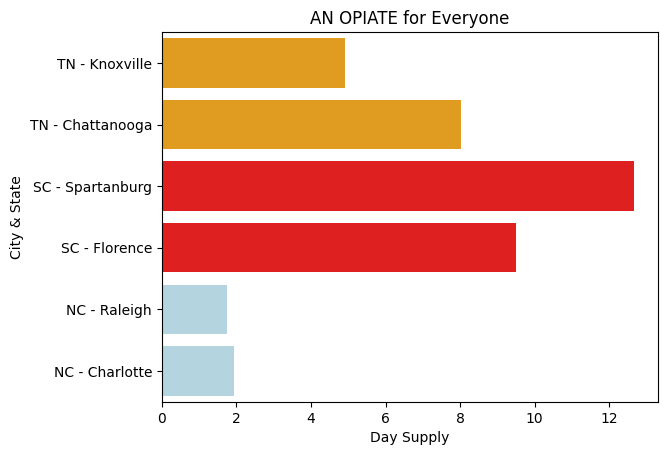

In [36]:
my_palette = {
              "TN - Knoxville": "orange",
              "TN - Chattanooga": "orange",
              "SC - Spartanburg": "red",
              "SC - Florence":"red",
              "NC - Charlotte" : "lightblue",
              "NC - Raleigh" : "lightblue",

              }

sns.barplot(data = RES10_2, y="state_city", x="day_supply_per_person", palette = my_palette);
plt.title("AN OPIATE for Everyone")
plt.ylabel("City & State")
plt.xlabel("Day Supply")
print('RES10b Day Supply per Person')
plt.show()

# RES10 analysis


From the opiate suppply for everyone, South Carolina has the largest daily supply of opiate per person, Spartanburg is the largest daily supply of opiate per person in South Carolina. And North Carolina has the smallest daily supply of opiate per person, Raleigh is the smallest daily supply of opiate per person in South Carolina.

The conclusion of the daily supply  of opiate has the similar graph with the average cost for Hydrocodone and Oxycodone. The largest and the smallest city are the same for both graph.Which refers to SC-Spartanburg is the largest and NC-Raieigh is the smallest

# TASK 4 YOUR ANALYSIS


---


RES11: TITLE “YOUR ANALYSIS”

RES12: TITLE “YOUR ANALYSIS”

RES13: TITLE “YOUR ANALYSIS”

RES14: TITLE “YOUR ANALYSIS”

RES15: TITLE “YOUR ANALYSIS”



## RES11:TITLE states have the most cost of drug service

In [37]:
print("RES11: state have the most cost of drug service")
RES11 = Prescriptions.merge(Physician_summary, left_on = 'prscrbr_npi', right_on='rndrng_npi', how = 'inner')
RES11 = RES11[RES11['official_usps_state_code'].isin(['SC', 'NC', 'TN'])]
RES11 = RES11.groupby(['official_usps_state_code', 'is_opiate']).agg({'tot_drug_cst':['sum']}).reset_index()
RES11.columns = ['official_usps_state_code', 'is_opiate', 'tot_drug_cst_sum']
RES11

RES11: state have the most cost of drug service


,official_usps_state_code,is_opiate,tot_drug_cst_sum
0,NC,No,4704709211.55
1,NC,Yes,106997357.65
2,SC,No,2310281464.81
3,SC,Yes,40023649.28
4,TN,No,3263596319.70
5,TN,Yes,58625571.22


RES11 states have the most amount of drug cost


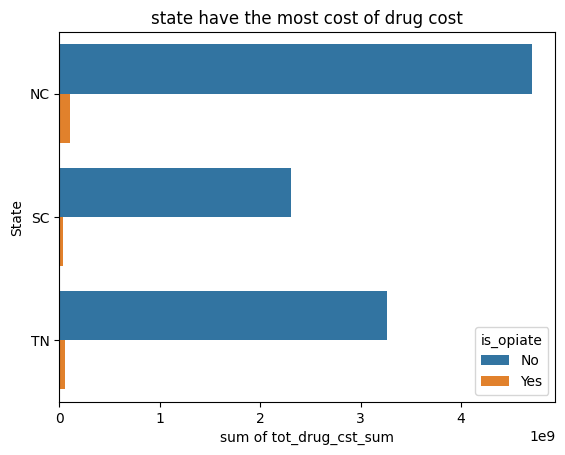

In [38]:
sns.barplot(data = RES11, y="official_usps_state_code", x="tot_drug_cst_sum", hue = 'is_opiate');
plt.title("state have the most cost of drug cost")
plt.ylabel("State")
plt.xlabel("sum of tot_drug_cst_sum")
print('RES11 states have the most amount of drug cost')
plt.show()

## RES12: TITLE Top 10 brand of opiate drug with most number of Beneficiaries

In [39]:
print("RES12: Top 10 brand of opiate drug with most number of Beneficiaries")
RES12 = Prescriptions.merge(Physician_summary,left_on = 'prscrbr_npi', right_on = 'rndrng_npi', how = 'inner')
RES12 = RES12[RES12['official_usps_state_code'].isin(['SC','NC','TN'])]
RES12 = RES12[RES12['is_opiate']=='Yes']
RES12_01 = RES12.groupby('brnd_name').agg({'tot_benes_x':['sum']}).reset_index()
RES12_01.columns=['brad_name','tot_benes_sum']
RES12_01 = RES12_01.nlargest(10,'tot_benes_sum')
RES12_01.reset_index(drop = True)

RES12: Top 10 brand of opiate drug with most number of Beneficiaries


,brad_name,tot_benes_sum
0,Hydrocodone-Acetaminophen,540023.00
1,Tramadol Hcl,302796.00
2,Oxycodone-Acetaminophen,238206.00
3,Oxycodone Hcl,154505.00
4,Morphine Sulfate Er,30643.00
5,Acetaminophen-Codeine,12744.00
6,Fentanyl,8065.00
7,Morphine Sulfate,7418.00
8,Hydromorphone Hcl,6884.00
9,Oxycontin,5716.00


Top 10 brand of opiate drug with most number of Beneficiaries


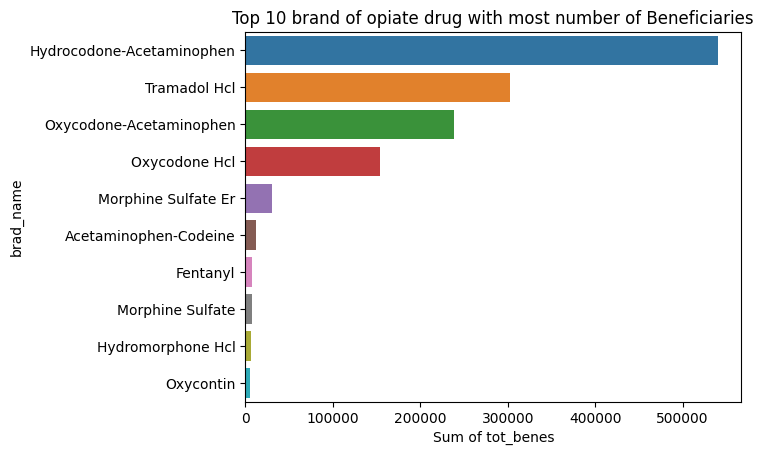

In [40]:
sns.barplot(data = RES12_01, y="brad_name", x="tot_benes_sum");
plt.title("Top 10 brand of opiate drug with most number of Beneficiaries")
plt.ylabel("brad_name")
plt.xlabel("Sum of tot_benes")
print('Top 10 brand of opiate drug with most number of Beneficiaries')
plt.show()

## RES13: TITLE "Top 3 consumption of opiate drug generic name for each state"

In [41]:
RES13 = Prescriptions.merge(Physician_summary,left_on='prscrbr_npi', right_on='rndrng_npi', how = 'inner')
RES13 = RES13[(RES13['is_opiate']=='Yes')&RES12['official_usps_state_code'].isin(['SC', 'NC','TN'])]
RES13 = RES13.groupby(['official_usps_state_code','brnd_name']).agg({'tot_clms':['sum']}).reset_index()
RES13.columns = ['official_usps_state_code','brnd_name', 'tot_clms_sum']
RES13 = RES13.sort_values(['tot_clms_sum'], ascending=False).groupby(['official_usps_state_code']).head(3)
RES13 = RES13.sort_values(['official_usps_state_code'],ascending = False)
RES13

,official_usps_state_code,brnd_name,tot_clms_sum
121,TN,Hydrocodone-Acetaminophen,751485
143,TN,Oxycodone-Acetaminophen,356575
150,TN,Tramadol Hcl,275558
70,SC,Hydrocodone-Acetaminophen,370710
99,SC,Tramadol Hcl,253651
91,SC,Oxycodone-Acetaminophen,157672
18,NC,Hydrocodone-Acetaminophen,621201
51,NC,Tramadol Hcl,481320
41,NC,Oxycodone-Acetaminophen,413262


RES13 consumption of opiate drug generic name for each state


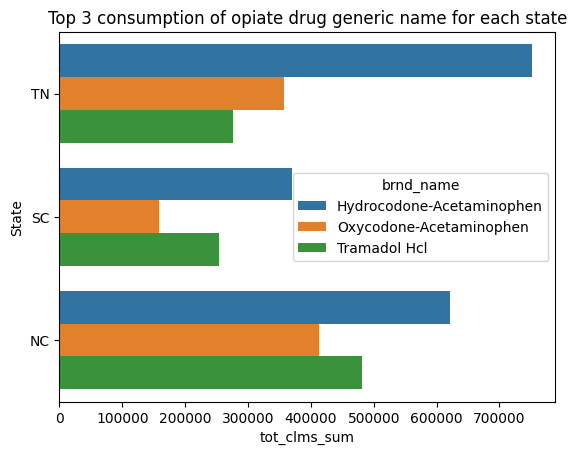

In [42]:
sns.barplot(data = RES13, y="official_usps_state_code", x="tot_clms_sum", hue = 'brnd_name');
plt.title("Top 3 consumption of opiate drug generic name for each state")
plt.ylabel("State")
plt.xlabel("tot_clms_sum")
print('RES13 consumption of opiate drug generic name for each state')
plt.show()

## TITLE RES14 Drug Service distribution by states


In [43]:
# RES14 = Physician_summary.groupby(['rndrng_prvdr_state_abrvtn']).agg({'drug_tot_srvcs':['count']}).reset_index()
# RES13 = RES13.groupby(['official_usps_state_code','brnd_name']).agg({'tot_clms':['sum']}).reset_index()
RES14 = Prescriptions.merge(Physician_summary,left_on='prscrbr_npi', right_on='rndrng_npi', how = 'inner')
RES14 = RES14[(RES14['is_opiate']=='Yes')]
RES14 = RES14.groupby('official_state_name')['density'].count().reset_index()
RES14 = RES14.sort_values(['density'],ascending = False).head(3)
RES14

,official_state_name,density
3,North Carolina,32371
5,Tennessee,21621
4,South Carolina,13717


RES14 Drug Service distribution by states


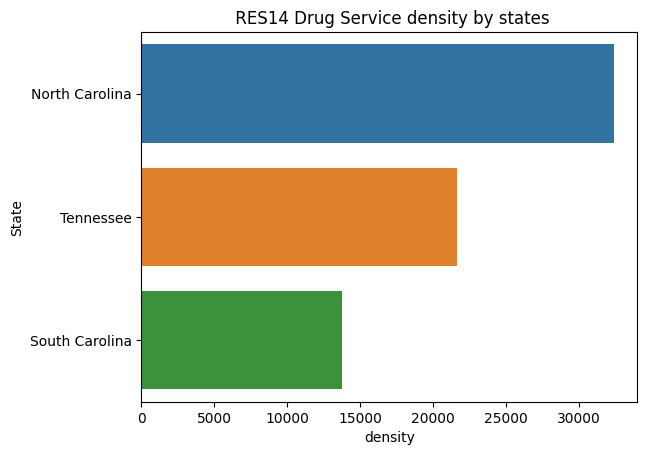

In [44]:
sns.barplot(data = RES14, y="official_state_name", x="density");
plt.title(" RES14 Drug Service density by states")
plt.ylabel("State")
plt.xlabel("density")
print('RES14 Drug Service distribution by states')
plt.show()

## TITLE RES15


In [45]:
print("RES15: state have the most percentage of drug service")
RES15 = Prescriptions.merge(Physician_summary, left_on = 'prscrbr_npi', right_on='rndrng_npi', how = 'inner')
RES15 = RES15[RES15['official_usps_state_code'].isin(['SC', 'NC', 'TN'])]
RES15 = RES15.groupby(['official_usps_state_code', 'is_opiate'])['tot_30day_fills'].sum().reset_index()
#RES15.columns = ['official_usps_state_code', 'is_opiate', 'tot_drug_cst_sum']
RES15_pivot = RES15.pivot(index='official_usps_state_code', columns='is_opiate', values='tot_30day_fills').reset_index()
RES15_pivot.columns = ['official_usps_state_code','No','Yes']
# RES15_pivot
# Calculate the percentage of opiate and non-opiate
RES15_pivot['Percentage_Opiates'] = (RES15_pivot['Yes'] / RES15_pivot['Yes'].sum()) * 100
RES15_pivot['Percentage_Non_Opiates'] = (RES15_pivot['No'] / RES15_pivot['No'].sum()) * 100
RES15_pivot


RES15: state have the most percentage of drug service


,official_usps_state_code,No,Yes,Percentage_Opiates,Percentage_Non_Opiates
0,NC,71298176.70,2185406.70,44.23,44.13
1,SC,36111597.00,1015321.00,20.55,22.35
2,TN,54151762.20,1740793.60,35.23,33.52


Percentage of drug service for different states


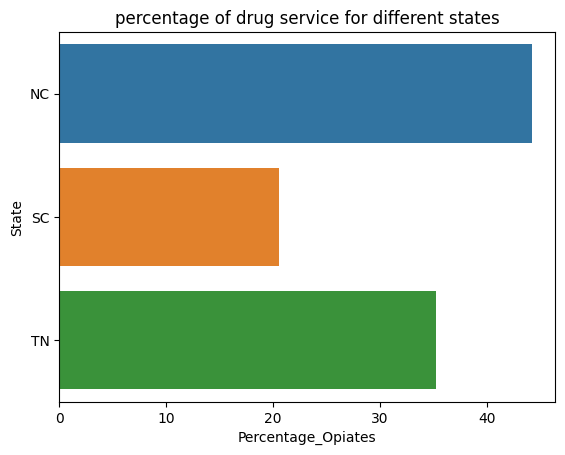

Percentage of drug service for different states


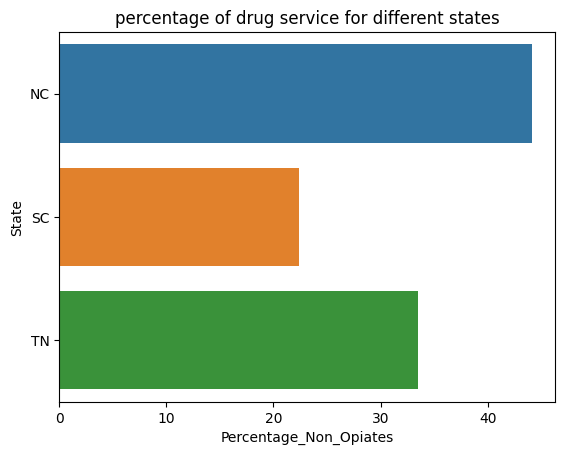

In [46]:
sns.barplot(data = RES15_pivot, y="official_usps_state_code", x="Percentage_Opiates");
plt.title("percentage of drug service for different states")
plt.ylabel("State")
plt.xlabel("Percentage_Opiates")
print('Percentage of drug service for different states')
plt.show()
sns.barplot(data = RES15_pivot, y="official_usps_state_code", x="Percentage_Non_Opiates");
plt.title("percentage of drug service for different states")
plt.ylabel("State")
plt.xlabel("Percentage_Non_Opiates")
print('Percentage of drug service for different states')
plt.show()